In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
from scipy import stats

In [4]:
connection = sql.connect(r'C:\Users\vidar\Documents\Skóli\TUC\Data_Science\Projects\kunskapskontrol_3\football_stats.db')

In [5]:
shots = pd.read_sql("""SELECT id, period, timestamp, minute, second, location_x, location_y, player, possession_team, shot_outcome, shot_statsbomb_xg
                      FROM WomensWorldCup2023 WHERE type IS 'Shot'
                      ORDER BY period, timestamp;""", connection)
shots['distance_from_goal'] = np.sqrt(((shots.location_y-40)**2) + ((shots.location_x-120)**2))

passes = pd.read_sql("""SELECT id, period, timestamp, minute, second, location_x, location_y, player, possession_team, 
                    pass_type, pass_length, pass_angle, pass_outcome
                    FROM WomensWorldCup2023 WHERE type IS 'Pass'
                    ORDER BY period, timestamp;""", connection)

passes.pass_outcome.fillna('Complete', inplace=True)
passes.pass_type.fillna('Pass', inplace=True)
passes['pass_length'] = passes.pass_length.apply(lambda x: x*0.9144)
passes['distance_from_goal'] = np.sqrt(((passes.location_y-40)**2) + ((passes.location_x-120)**2))

C:\Users\vidar\AppData\Local\Temp\ipykernel_24700\3204003090.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passes.pass_outcome.fillna('Complete', inplace=True)
C:\Users\vidar\AppData\Local\Temp\ipykernel_24700\3204003090.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

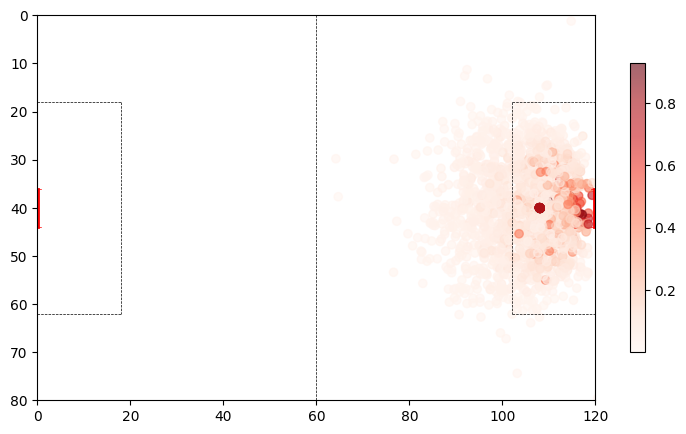

In [7]:
fig, ax = plt.subplots(figsize=(9, 5))
ax = plt.scatter(shots['location_x'], shots['location_y'], c=shots['shot_statsbomb_xg'], alpha=0.6, cmap='Reds')
fig.colorbar(ax, shrink=0.75)
ax = plt.gca()
ax.set_ylim([80, 0])
ax.set_xlim([0, 120])
ax.axhline(y=18, xmax=0.15, linestyle='--', linewidth=0.5, c='black')
ax.axhline(y=62, xmax=0.15, linestyle='--', linewidth=0.5, c='black')
ax.axhline(y=36, xmax=0.007, linewidth=0.5, c='red')
ax.axhline(y=44, xmax=0.007, linewidth=0.5, c='red')
ax.axvline(x=0.1, ymax=(36/80), ymin=(44/80), linewidth=2, c='red')
ax.axvline(x=119.7, ymax=(36/80), ymin=(44/80), linewidth=2, c='red')
ax.axhline(y=36, xmin=0.993, xmax=1, linewidth=0.5, c='red')
ax.axhline(y=44, xmin=0.993, xmax=1, linewidth=0.5, c='red')
ax.axhline(y=18, xmin=0.85, xmax=1, linestyle='--', linewidth=0.5, c='black')
ax.axhline(y=62, xmin=0.85, xmax=1, linestyle='--', linewidth=0.5, c='black')
ax.axvline(x=60, linestyle='--', linewidth=0.5, c='black')
ax.axvline(x=18, ymax=0.225, ymin=0.775, linestyle='--', linewidth=0.5, c='black')
ax.axvline(x=102, ymax=0.225, ymin=0.775, linestyle='--', linewidth=0.5, c='black')


PearsonRResult(statistic=np.float64(-0.45049899741221383), pvalue=np.float64(9.582190516275209e-85))

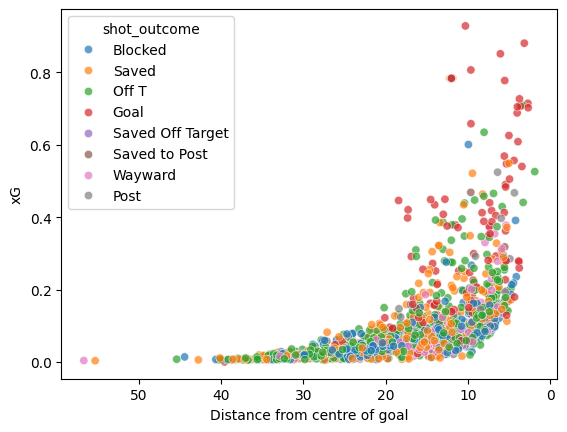

In [67]:

fig, ax = plt.subplots(1)
ax = sns.scatterplot(x=shots['distance_from_goal'], y=shots['shot_statsbomb_xg'], hue=shots['shot_outcome'],alpha=0.7)
ax.set_ylabel('xG')
ax.set_xlabel('Distance from centre of goal')
ax.invert_xaxis()

stats.pearsonr(shots['distance_from_goal'], shots['shot_statsbomb_xg'])

dtype('int64')

Text(0.5, 0, 'Minute')

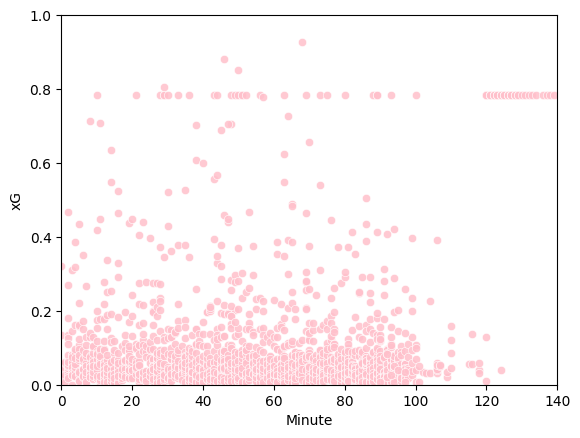

In [61]:
fig, ax = plt.subplots()
ax = sns.scatterplot(shots, x='minute', y='shot_statsbomb_xg', c='Pink', alpha=0.85)
ax = plt.gca()
ax.set_ylim([0,1])
ax.set_xlim([0, 140])
ax.set_ylabel('xG')
ax.set_xlabel('Minute')



In [68]:
passes = pd.read_sql("""SELECT id, period, timestamp, minute, second, location_x, location_y, player, possession_team, 
                    pass_type, pass_length, pass_angle, pass_outcome
                    FROM WomensWorldCup2023 WHERE type IS 'Pass'
                    ORDER BY period, timestamp;""", connection)

passes.pass_outcome.fillna('Complete', inplace=True)
passes.pass_type.fillna('Pass', inplace=True)
passes['pass_length'] = passes.pass_length.apply(lambda x: x*0.9144)
passes['distance_from_goal'] = np.sqrt(((passes.location_y-40)**2) + ((passes.location_x-120)**2))

C:\Users\vidar\AppData\Local\Temp\ipykernel_11120\2662693837.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passes.pass_outcome.fillna('Complete', inplace=True)
C:\Users\vidar\AppData\Local\Temp\ipykernel_11120\2662693837.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

C:\Users\vidar\AppData\Local\Temp\ipykernel_15072\3534847367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passes.pass_outcome.fillna('Complete', inplace=True)
C:\Users\vidar\AppData\Local\Temp\ipykernel_15072\3534847367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

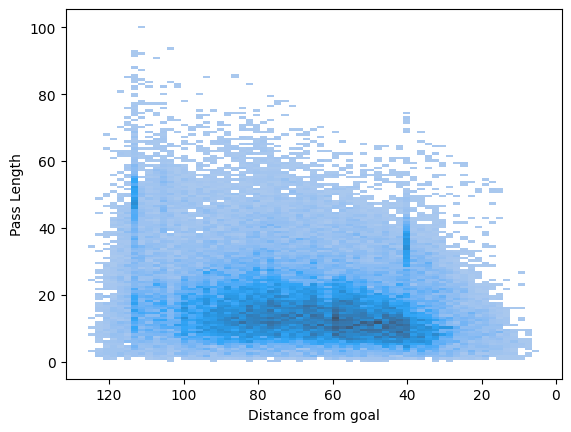

In [91]:
fig, ax = plt.subplots()
ax = sns.histplot(data=passes, y='pass_length', x='distance_from_goal')
ax.set_xlabel('Distance from goal')
ax.set_ylabel('Pass Length')
ax.invert_xaxis()

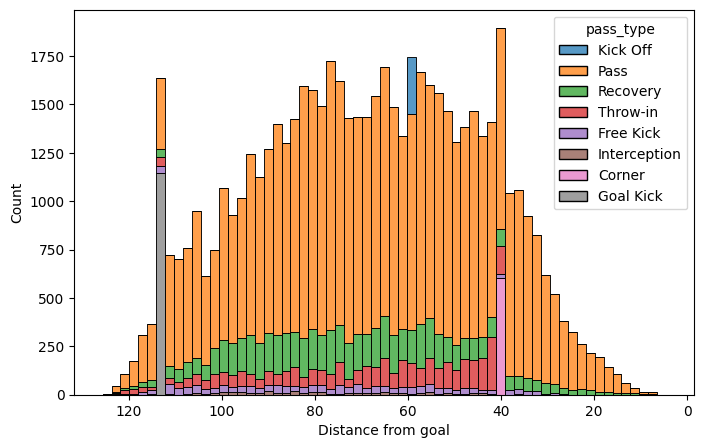

In [93]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.histplot(data=passes, x='distance_from_goal', hue='pass_type', multiple='stack')
ax.set_xlabel('Distance from goal')
ax.invert_xaxis()


Text(0.5, 0, 'Pass Length (m)')

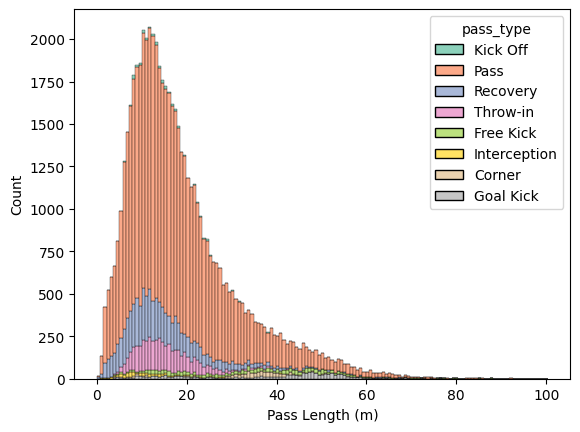

In [32]:
fig, ax = plt.subplots()
ax = sns.histplot(data=passes, x='pass_length', hue='pass_type', stat='count', palette='Set2', multiple='stack')
ax.set_xlabel('Pass Length (m)')


Text(0.02, 0.5, 'Pass Length (m)')

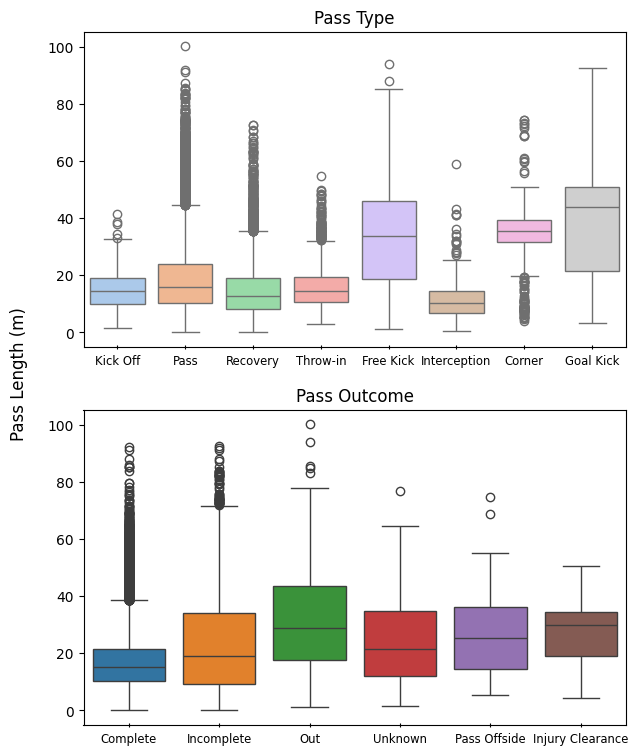

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(7, 9))
ax1 = sns.boxplot(passes, y='pass_length', x='pass_type', hue='pass_type', legend=False, palette='pastel', ax=ax1)
ax2 = sns.boxplot(passes, y='pass_length', x='pass_outcome', hue='pass_outcome', legend=False, ax=ax2)
ax1.set_title('Pass Type')
ax2.set_title('Pass Outcome')
ax1.tick_params(direction='inout', axis='x', labelsize='small')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', direction='inout', labelsize='small')
fig.supylabel('Pass Length (m)')

